In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import os
from  IPython.display import Audio
from librosa import display
import librosa
import numpy as np
from scipy.io.wavfile import read as read_wav
import sklearn
import soundfile as sf
import scipy
import csv
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from joblib import parallel_backend
import cupy as xp
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import catboost

os.chdir(r'C:\Users\777\Documents\dusha')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

C:\Users\777\anaconda3\lib\site-packages\cupy\_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


cuda


In [28]:
podcast_train_cycle = pd.read_csv('dataset_podcast_cycle_85.csv')
crowd_train_cycle = pd.read_csv('dataset_crowd_cycle_85.csv')


In [29]:
podcast_train_cycle['dataset']= 'podcast'
crowd_train_cycle['dataset']= 'crowd'


In [30]:
train_features = pd.concat([crowd_train_cycle, podcast_train_cycle])
train_features = train_features.reset_index()
train_features.drop(columns=['index'], inplace=True)
train_features['label'] = train_features['label'].apply(lambda x: x.split()[1])
train_features.dropna(inplace=True)
train_features = train_features[train_features['label']!= 'other']
train_features

,audio_path,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,mfcc_mean11,mfcc_mean12,mfcc_mean13,mfcc_mean14,mfcc_mean15,mfcc_mean16,mfcc_mean17,mfcc_mean18,mfcc_mean19,mfcc_mean20,mfcc_mean21,mfcc_mean22,mfcc_mean23,mfcc_mean24,mfcc_mean25,mfcc_mean26,mfcc_mean27,mfcc_mean28,mfcc_mean29,mfcc_mean30,mfcc_mean31,mfcc_mean32,mfcc_mean33,mfcc_mean34,mfcc_mean35,mfcc_mean36,mfcc_mean37,mfcc_mean38,mfcc_mean39,mfcc_mean40,mfcc_std1,mfcc_std2,mfcc_std3,mfcc_std4,mfcc_std5,mfcc_std6,mfcc_std7,mfcc_std8,mfcc_std9,mfcc_std10,mfcc_std11,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,mfcc_std21,mfcc_std22,mfcc_std23,mfcc_std24,mfcc_std25,mfcc_std26,mfcc_std27,mfcc_std28,mfcc_std29,mfcc_std30,mfcc_std31,mfcc_std32,mfcc_std33,mfcc_std34,mfcc_std35,mfcc_std36,mfcc_std37,mfcc_std38,mfcc_std39,mfcc_std40,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,label,dataset
0,1eea91ec70debfe042d0fe8264953a5b.wav,-521.09546,63.211052,18.538889,22.467293,-4.084557,16.792700,-7.026610,11.438933,-2.423285,8.425105,1.469111,5.431342,-0.492110,7.422756,-6.038994,6.516529,-6.309702,5.956050,-5.953938,3.730058,-4.543047,4.691480,-6.077981,0.942520,-7.344798,0.544036,-5.463185,4.363636,-1.374526,4.111041,-3.448724,0.369081,-5.228223,0.075790,-4.429928,1.840307,-2.326104,1.985196,-1.627309,3.069998,65.239580,28.898169,13.875507,12.428449,13.521148,11.587573,11.257417,7.535901,8.052610,7.734472,5.995280,6.635050,4.371682,4.087995,7.299711,4.623286,5.428656,5.075869,5.555319,6.114348,4.790083,5.188786,4.040011,4.535439,4.078957,5.303661,5.705019,6.225931,8.242825,7.645526,5.200780,4.491001,4.899043,5.028364,5.768295,5.677087,5.109217,6.414813,6.125465,6.707503,2187.601872,703.028838,0.591275,4727.788881,1107.778462,neutral,crowd
1,363e920858cf8605a3480fb73cb30ec5.wav,-425.91498,92.187960,21.269213,0.271258,-5.842022,2.089278,5.916405,-26.959728,-9.759957,-3.837540,-7.656571,-7.213402,-5.880498,4.379867,-2.882426,9.982515,-9.256194,-8.740344,-3.445716,-2.045116,-10.234421,-10.013928,-10.952175,1.862140,-1.335112,-2.420104,-1.752194,3.247146,14.759916,10.159458,8.336325,4.670157,4.356313,3.903877,-2.784314,-2.956625,-3.469492,-0.040206,-2.473580,-4.351184,86.434180,55.900043,21.853872,23.159334,15.900457,19.361382,12.738382,15.460214,10.668975,9.419206,13.263988,9.370239,8.832101,5.437285,9.816132,7.464654,6.507839,8.203049,8.059320,9.245628,9.073567,7.139452,7.712218,6.353754,8.112679,7.533005,11.444584,11.526541,14.499127,14.824301,12.804939,12.307423,8.434153,6.210081,6.325312,4.541350,6.879099,5.886856,6.475463,4.847267,1740.093257,1181.994766,1.361753,3120.594113,2019.682822,neutral,crowd
2,0e82bd29c9857c9c249f3e5356f8533e.wav,-308.51154,126.267850,-9.504063,43.462890,7.078705,3.291415,0.339564,-0.713893,-6.003462,-8.198472,8.949667,3.093620,-8.148194,12.033465,-9.847435,-8.045248,-3.488046,-0.635493,-1.867015,1.917718,1.092418,0.243022,1.338178,1.966220,-3.431333,1.247729,-3.383866,0.818968,-1.818012,-3.329769,-1.014374,-3.759136,-1.825039,-2.648346,1.699159,-0.693569,2.083588,4.148433,2.557991,3.279791,81.105750,45.729200,23.752192,21.321749,21.676899,14.542756,10.677503,17.361380,8.522185,15.339280,7.090508,8.083288,9.454620,8.852375,8.536924,6.277461,5.757379,5.804892,6.506647,5.656515,7.163466,4.700060,4.676595,4.585661,5.642563,3.983017,4.920260,6.336871,5.870075,8.233633,8.221124,6.758690,6.155618,5.793309,6.155479,6.586518,9.228495,10.874211,11.916828,10.092102,1229.710381,688.241180,2.317545,2457.939680,1335.693991,neutral,crowd
3,e558050c31b6552670255ed70b2c454a.wav,-499.99720,63.792366,24.833897,-1.055524,18.842121,-5.949051,11.603047,-10.878907,2.214535,-15.314258,-5.654404,-6.513677,-7.925723,-0.020425,-2.751681,-0.743792,-2.657186,0.369404,-2.819288,-1.567720,-5.447450,-0.207659,-6.759076,-3.736205,-4.346295,1.440834,-0.755217,2.410453,0.305885,6.299418,1.251294,3.300564,-2.036285,1.839485,-1.250087,1.448547,-2.741425,-0.738519,

In [31]:
print(train_features.label.value_counts())

label
neutral     80012
sad         30891
positive    25309
angry       22569
Name: count, dtype: int64


In [32]:
X = train_features[train_features.columns.drop(['label', 'audio_path', 'dataset'])]
y = pd.DataFrame(train_features[train_features.columns[-2]])
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=123)


dic = {'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3, 'other': 4}
y_train = y_train['label'].map(dic)
y_train.dropna(inplace=True)
y_test = y_test['label'].map(dic)
y_test.dropna(inplace=True)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()
# Create a PyTorch dataset and dataloader
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=128, shuffle=True)

In [37]:
class VariableHiddenDimBiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(VariableHiddenDimBiLSTM, self).__init__()
        self.num_layers = len(hidden_dims)
        self.lstm_layers = nn.ModuleList()

        self.lstm_layers.append(nn.LSTM(input_dim, hidden_dims[0], bidirectional=True))

        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_dims[i-1]*2, hidden_dims[i], bidirectional=True))

        self.fc = nn.Linear(hidden_dims[-1]*2, output_dim)
        self.hidden_dims = hidden_dims

    def init_hidden(self, bs):
        hidden = []
        for i in range(self.num_layers):
            hidden.append((torch.zeros(2, bs, self.hidden_dims[i]), torch.zeros(2, bs, self.hidden_dims[i])))
        return hidden


    def forward(self, X, hidden):
        out = X.unsqueeze(0)
        for i in range(self.num_layers):
            out, hidden[i] = self.lstm_layers[i](out, hidden[i])
            #out = self.dropout_layers[i](out)  # Применение Dropout
        out = out.squeeze(0)
        out = torch.log_softmax(self.fc(out), dim=1)
        return out, hidden


model = VariableHiddenDimBiLSTM(input_dim=85, hidden_dims=[2048, 1024, 512], output_dim=4)


model.to(device)
X_test = X_test.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
from tqdm import tqdm
def accuracy(y_pred, y_acc):
    with torch.no_grad():
        return torch.sum(torch.max(torch.exp(y_pred), dim=1)[1] == y_acc).item() / len(y_acc)
def f1_f(y_pred, y_true):
    with torch.no_grad():
        y_pred = torch.max(torch.exp(y_pred), dim=1)[1].cpu().numpy()
        y_true = y_true.cpu().numpy()
        return f1_score(y_true, y_pred, average='weighted')

In [39]:
epochs = 7
trf1 = []
tsf1 =[]
tsa=[]
tra=[]
trls = []
tsls = []
for e in range(1, epochs + 1):
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x, y = batch
        x, y = x.cuda(), y.cuda()

        # Initialize the hidden state for each layer
        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

        # Forward pass and backprop
        out, hidden = model(x, hidden)
        loss = loss_function(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0

    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x, y = batch
            x, y = x.cuda(), y.cuda()

            hidden = model.init_hidden(x.size(0))
            for i in range(len(hidden)):
                hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

            out, hidden = model(x, hidden)
            loss = loss_function(out, y)

            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print("Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(e, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))

100%|██████████| 348/348 [00:01<00:00, 208.13it/s]


Epoch    1 | Train Loss 1.0174 | Train Acc 0.5662 | Train F1 0.5330 | Test Loss 0.9842 | Test Acc 0.5849 | Test F1 0.5710


100%|██████████| 348/348 [00:01<00:00, 281.74it/s]


Epoch    2 | Train Loss 0.9509 | Train Acc 0.6001 | Train F1 0.5796 | Test Loss 0.9443 | Test Acc 0.5993 | Test F1 0.5837


100%|██████████| 348/348 [00:01<00:00, 289.06it/s]


Epoch    3 | Train Loss 0.8971 | Train Acc 0.6268 | Train F1 0.6120 | Test Loss 0.9111 | Test Acc 0.6226 | Test F1 0.6092


100%|██████████| 348/348 [00:01<00:00, 300.54it/s]


Epoch    4 | Train Loss 0.8320 | Train Acc 0.6575 | Train F1 0.6467 | Test Loss 0.9002 | Test Acc 0.6324 | Test F1 0.6240


100%|██████████| 348/348 [00:01<00:00, 290.10it/s]


Epoch    5 | Train Loss 0.7487 | Train Acc 0.6946 | Train F1 0.6871 | Test Loss 0.9039 | Test Acc 0.6355 | Test F1 0.6236


100%|██████████| 348/348 [00:01<00:00, 292.97it/s]


Epoch    6 | Train Loss 0.6320 | Train Acc 0.7448 | Train F1 0.7404 | Test Loss 0.9755 | Test Acc 0.6297 | Test F1 0.6263


100%|██████████| 348/348 [00:01<00:00, 291.72it/s]

Epoch    7 | Train Loss 0.4856 | Train Acc 0.8065 | Train F1 0.8045 | Test Loss 1.1059 | Test Acc 0.6224 | Test F1 0.6167


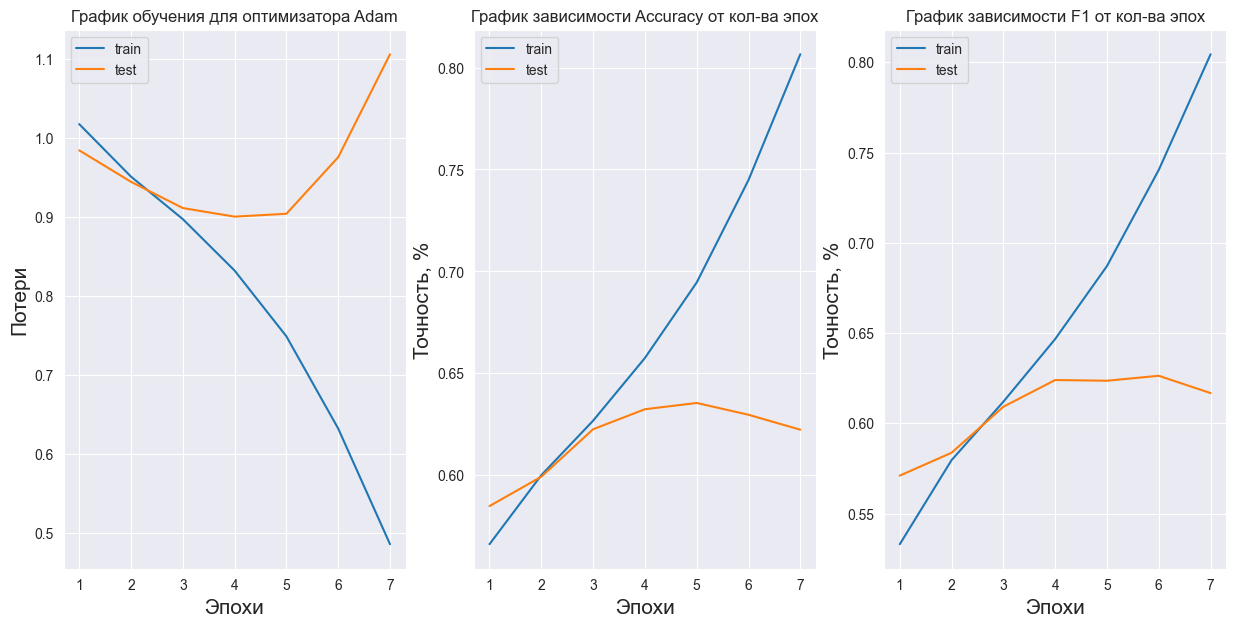

In [40]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.plot(range(1, e + 1), trls, label="train")
plt.plot(range(1, e + 1), tsls, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График обучения для оптимизатора Adam")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(1, e + 1), tra, label="train")
plt.plot(range(1, e + 1), tsa, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.subplot(1, 3, 3)
plt.plot(range(1, e + 1), trf1, label="train")
plt.plot(range(1, e + 1), tsf1, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости F1 от кол-ва эпох")
plt.grid
plt.show()